Welcome to JupyROOT 6.14/04
[565301.5, 572878.2, 603637.9, 579682.8, 437081.6, 352892.8, 1153649.5, 577038.1, 0.0, 0.0]


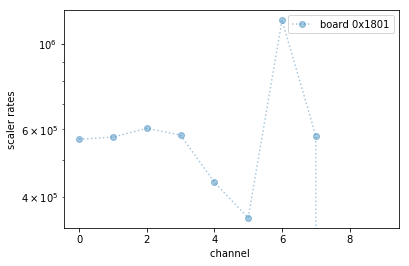

[556585.9, 579687.0, 547790.0, 579048.9, 467444.5, 454173.9, 535029.9, 527957.6, 742171.9, 789799.9]


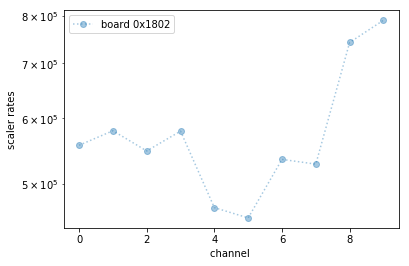

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from fst import *
import tdc_daq as td
number_of_TDC_channels = 10
tdc_channels = list(range(0, number_of_TDC_channels))

measure_board_list =  [  "0x1801","0x1802" ]
spillbreak_rate_scintillator = 3000


for b in range(0,len(measure_board_list)):


    name = measure_board_list[b]
    #wait_for_spill_break(threshold_rate=spillbreak_rate_scintillator)
    #wait_for_spill(threshold_rate=spillbreak_rate_scintillator)
    scaler_rates = td.scaler_rate_of_TDC(name,tdc_channels,10) 
    print(scaler_rates)
    plt.errorbar(range(0,len(scaler_rates)),scaler_rates, yerr=None, xerr=None, fmt='o:', alpha=0.4,label = "board {:s}".format(name))
    plt.xlabel("channel ")
    plt.ylabel("scaler rates")  
    plt.legend()
    plt.yscale('log')
    plt.show()

In [2]:

spike_reject_list_TDC = [0,1,2,3,4,5,6,7,8]
#spike_reject_list_TDC = [8,5,2,0]
trend_scan_Nsteps =len(spike_reject_list_TDC)
measure_time=10
# measure_board_list =  [ "0902", "0905"]  
#measure_board_list =  [ "0902"           ]  
measure_board_list =  [  "0x1801","0x1802" ]


from matplotlib import pyplot as plt
%matplotlib inline

from fst import *
from my_utils import *
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import time
import db
from cw_pasttrec_functions import *

from my_utils import *

set_width_max_of_jupyterpad()


for b in range(0,len(measure_board_list)):

    average_scaler_list        =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
    average_scaler_list_err    =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
    #ptc.init_active_boards(pt_pktime,pt_gain,pt_threshold_default) 
    # get scaler rates for chosen threshold/gain/peaking time as simple estimate of noise:
    scaler_list_trend        =  [ []  for i in range(trend_scan_Nsteps) ] 

    scaler_list_trend_channel = [ []  for i in range(16)] 
    name = measure_board_list[b]
    for p in range(0,trend_scan_Nsteps):
             #setTDC spike rejection to ~50ns 
            print("set TDC spike rejection ", spike_reject_list_TDC[p])
            os.system("trbcmd loadbit 0x1801 0xd580 0xf0000000 0x{:d}0000000".format(spike_reject_list_TDC[p]))
            #wait_for_spill_break(threshold_rate=spillbreak_rate_scintillator)
            wait_for_spill(threshold_rate=spillbreak_rate_scintillator)
            #scaler_rates = td.scaler_rate_of_board(name,measure_time) 
            scaler_rates = td.scaler_rate_of_TDC(name,tdc_channels,5) 
            print(scaler_rates)            
            #scaler_rates = td.scaler_rate("0x0350",[48,49],1)

            for ch in range(0,len(scaler_rates)):
                    scaler_list_trend_channel[ch] += [ scaler_rates[ch] ]
                
#  plt.show()
#  plt.legend()
# scaler_rates = td.scaler_rate_of_board(name,measure_time) 
    for ch in range(0,len(scaler_rates)):
        if scaler_list_trend_channel[ch]:
                plt.errorbar(range(0,len(scaler_list_trend_channel[ch])),scaler_list_trend_channel[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "board {:s} channel {:d}".format(name,ch))
                plt.xlabel("TDC spike rejection setting ")
                plt.ylabel("scaler rates - inside spill")  
        plt.legend()
        plt.show()

set TDC spike rejection  0
br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br br 

KeyboardInterrupt: 

[40.0, 0.0]
[51.0, 0.0]
[56.0, 0.0]
[47.0, 0.0]
[34.0, 0.0]
[52.0, 0.0]
[50.0, 0.0]
[40.0, 0.0]
[47.0, 0.0]
[43.0, 0.0]
[35.0, 0.0]


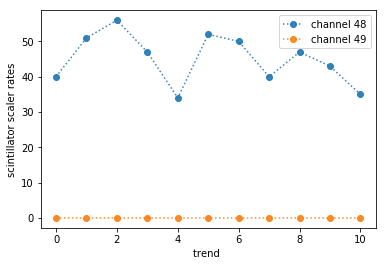

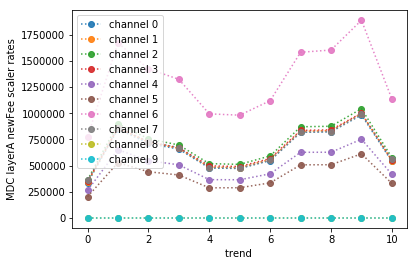

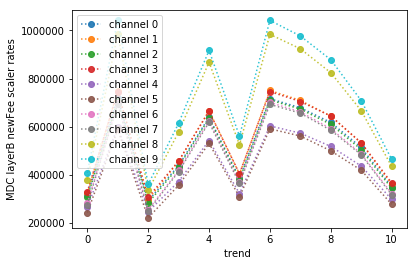

In [3]:
### time trend of sume channels
trend_scan_Nsteps = 11
measure_time=1
# measure_board_list =  [ "0902", "0905"]  
measure_board_list =  [ "0902"]
channellist = [48,49]
tdc_channels = list(range(0, number_of_TDC_channels))

from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT
import db
from cw_pasttrec_functions import *

from my_utils import *

set_width_max_of_jupyterpad()
 
# get scaler rates for chosen threshold/gain/peaking time as simple estimate of noise:
scaler_list_trend        =  [ []  for i in range(trend_scan_Nsteps) ] 

scaler_list_trend_channel = [ []  for i in range(len(channellist))]
scaler_list_trend_channel_MDCA = [ []  for i in range(len(tdc_channels))]
scaler_list_trend_channel_MDCB = [ []  for i in range(len(tdc_channels))]
for b in range(0,len(measure_board_list)):
 name = measure_board_list[b]
 for p in range(0,trend_scan_Nsteps):
#             scaler_rates = td.scaler_rate_of_board(name,measure_time) 
            scaler_rates = td.scaler_rate("0x0350",channellist,1)
            scaler_rates_MDCA = td.scaler_rate("0x1801",tdc_channels,1)
            scaler_rates_MDCB = td.scaler_rate("0x1802",tdc_channels,1)        
            print(scaler_rates)
 
            for ch in range(0,len(scaler_rates)):
                scaler_list_trend_channel[ch] += [ scaler_rates[ch] ]
            for ch in range(0,len(scaler_rates_MDCA)):
                scaler_list_trend_channel_MDCA[ch] += [ scaler_rates_MDCA[ch] ]            
            for ch in range(0,len(scaler_rates_MDCB)):
                scaler_list_trend_channel_MDCB[ch] += [ scaler_rates_MDCB[ch] ]                 
####################


for ch in range(0,len(scaler_rates)):
                if scaler_list_trend_channel[ch]:
                        plt.errorbar(range(0,len(scaler_list_trend_channel[ch])),scaler_list_trend_channel[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "channel {:d}".format(channellist[ch]))
                        plt.xlabel("trend ")
                        plt.ylabel("scintillator scaler rates")  
plt.legend()
plt.show()


for ch in range(0,len(scaler_rates_MDCA)):
                if scaler_list_trend_channel_MDCA[ch]:
                        plt.errorbar(range(0,len(scaler_list_trend_channel_MDCA[ch])),scaler_list_trend_channel_MDCA[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "channel {:d}".format(tdc_channels[ch]))
                        plt.xlabel("trend ")
                        plt.ylabel("MDC layerA newFee scaler rates")  
plt.legend()
plt.show()

for ch in range(0,len(scaler_rates_MDCB)):
                if scaler_list_trend_channel_MDCB[ch]:
                        plt.errorbar(range(0,len(scaler_list_trend_channel_MDCB[ch])),scaler_list_trend_channel_MDCB[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "channel {:d}".format(tdc_channels[ch]))
                        plt.xlabel("trend ")
                        plt.ylabel("MDC layerB newFee scaler rates")  
plt.legend()
plt.show()